In [131]:
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('display.max_colwidth', None)
import numpy as np
import re

In [55]:
income = pd.read_csv('MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Census 2019.csv')
income.head().T

/Users/jeet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,110,111,148,149) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4
GEO_ID,id,8600000US00601,8600000US00602,8600000US00603,8600000US00606
NAME,Geographic Area Name,ZCTA5 00601,ZCTA5 00602,ZCTA5 00603,ZCTA5 00606
S1903_C01_001E,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,5509,12740,19228,1946
S1903_C01_001M,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,189,443,503,176
S1903_C01_002E,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,4180,10888,15439,938
S1903_C01_002M,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,264,462,541,174
S1903_C01_003E,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,27,341,758,6
S1903_C01_003M,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,25,113,165,9
S1903_C01_004E,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,6,12,42,10
S1903_C01_004M,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,11,21,36,16


In [56]:
income.columns = list(income.loc[0])

In [57]:
income.drop([0], inplace=True)

In [58]:
income.dtypes

id                                                                                                                                                                                     object
Geographic Area Name                                                                                                                                                                   object
Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households                                                                                    object
Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households                                                                             object
Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White                                                                 object
Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE 

In [85]:
keep_cols = ['id',
             'Geographic Area Name',
             'Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households']

In [105]:
income_subset = income[keep_cols]

In [106]:
income_subset.shape

(33120, 3)

In [107]:
income_subset.head().T

,1,2,3,4,5
id,8600000US00601,8600000US00602,8600000US00603,8600000US00606,8600000US00610
Geographic Area Name,ZCTA5 00601,ZCTA5 00602,ZCTA5 00603,ZCTA5 00606,ZCTA5 00610
Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households,14361,16807,16049,12119,19898


In [108]:
zip_code_mapping = pd.read_csv('ZiptoZcta_Crosswalk_2021.xlsx - ziptozcta2020.csv')

In [109]:
zip_code_mapping.head().T

,0,1,2,3,4
ZIP_CODE,501,544,601,602,603
PO_NAME,Holtsville,Holtsville,Adjuntas,Aguada,Aguadilla
STATE,NY,NY,PR,PR,PR
ZIP_TYPE,Post Office or large volume customer,Post Office or large volume customer,Zip Code Area,Zip Code Area,Zip Code Area
ZCTA,11742,11742,00601,00602,00603
zip_join_type,Spatial join to ZCTA,Spatial join to ZCTA,Zip matches ZCTA,Zip matches ZCTA,Zip matches ZCTA


In [110]:
CA_zcta = zip_code_mapping[zip_code_mapping['STATE'] == 'CA']['ZCTA'].to_list()
CA_zcta

['90001',
 '90002',
 '90003',
 '90004',
 '90005',
 '90006',
 '90007',
 '90008',
 '90045',
 '90010',
 '90011',
 '90012',
 '90013',
 '90014',
 '90015',
 '90016',
 '90017',
 '90018',
 '90019',
 '90020',
 '90021',
 '90022',
 '90023',
 '90024',
 '90025',
 '90026',
 '90027',
 '90028',
 '90029',
 '90001',
 '90031',
 '90032',
 '90033',
 '90034',
 '90035',
 '90036',
 '90037',
 '90038',
 '90039',
 '90040',
 '90041',
 '90042',
 '90043',
 '90044',
 '90045',
 '90046',
 '90047',
 '90048',
 '90049',
 '90042',
 '90001',
 '90001',
 '90012',
 '90001',
 '90015',
 '90056',
 '90057',
 '90058',
 '90059',
 '90001',
 '90061',
 '90062',
 '90063',
 '90064',
 '90065',
 '90066',
 '90067',
 '90068',
 '90069',
 '90020',
 '90071',
 '90027',
 '90073',
 '90071',
 '90020',
 '90020',
 '90077',
 '90028',
 '90079',
 '90045',
 '90017',
 '90037',
 '90045',
 '90017',
 '90012',
 '90001',
 '90017',
 '90089',
 '90090',
 '90040',
 '90028',
 '90094',
 '90095',
 '90017',
 '90001',
 '90045',
 '90201',
 '90201',
 '90210',
 '90210',


In [111]:
income_subset['zcta'] = income_subset['Geographic Area Name'].apply(lambda x: x[-5:])

/var/folders/41/3t5xmrtj529186zt9p86v_mh0000gn/T/ipykernel_14446/2329642765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['zcta'] = income_subset['Geographic Area Name'].apply(lambda x: x[-5:])


In [112]:
income_subset = income_subset[income_subset['zcta'].isin(CA_zcta)]

In [113]:
income_subset.shape

(1762, 4)

In [114]:
income_subset.columns = ['id','Geographic Area Name','Income', 'zcta']

In [115]:
income_subset.head().T

,30011,30012,30013,30014,30015
id,8600000US90001,8600000US90002,8600000US90003,8600000US90004,8600000US90005
Geographic Area Name,ZCTA5 90001,ZCTA5 90002,ZCTA5 90003,ZCTA5 90004,ZCTA5 90005
Income,43360,37285,40598,49675,38491
zcta,90001,90002,90003,90004,90005


In [117]:
income_subset['Income'] = income_subset['Income'].apply(lambda x: re.sub(r'[^0-9]','',x))
income_subset['Income'] = income_subset['Income'].replace('',np.nan).astype('float64')

In [120]:
income_subset['Income'] = round(income_subset['Income'].fillna(income_subset['Income'].mean()),2)

In [209]:
income_subset.dtypes

id                       object
Geographic Area Name     object
Income                  float64
zcta                     object
dtype: object

In [211]:
income_subset.to_csv('Median_Income_Clean.csv', index = False)

### Employment

In [125]:
employment = pd.read_csv('EMPLOYMENT STATUS Census 2019.csv')
employment.head().T

/Users/jeet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4
GEO_ID,id,8600000US00601,8600000US00602,8600000US00603,8600000US00606
NAME,Geographic Area Name,ZCTA5 00601,ZCTA5 00602,ZCTA5 00603,ZCTA5 00606
S2301_C01_001E,Estimate!!Total!!Population 16 years and over,14003,31726,39163,5417
S2301_C01_001M,Margin of Error!!Total!!Population 16 years an...,247,208,704,329
S2301_C01_002E,Estimate!!Total!!Population 16 years and over!...,929,1860,2628,379
S2301_C01_002M,Margin of Error!!Total!!Population 16 years an...,68,169,202,73
S2301_C01_003E,Estimate!!Total!!Population 16 years and over!...,1140,2562,3048,470
S2301_C01_003M,Margin of Error!!Total!!Population 16 years an...,32,31,214,105
S2301_C01_004E,Estimate!!Total!!Population 16 years and over!...,1125,2485,2967,329
S2301_C01_004M,Margin of Error!!Total!!Population 16 years an...,36,22,188,53


In [126]:
employment.columns = list(employment.loc[0])

In [127]:
employment.drop([0], inplace=True)

In [135]:
pd.Series([col.strip() for col in employment.columns])

0                                                                                                                                                                                 id
1                                                                                                                                                               Geographic Area Name
2                                                                                                                                      Estimate!!Total!!Population 16 years and over
3                                                                                                                               Margin of Error!!Total!!Population 16 years and over
4                                                                                                                 Estimate!!Total!!Population 16 years and over!!AGE!!16 to 19 years
5                                                                                              

In [171]:
estimate_cols = [col for col in employment.columns if 'estimate' in col.lower()]
keep_cols = list(employment.columns[:2])

In [172]:
keep_cols.extend(estimate_cols)

In [173]:
keep_cols[:3].extend(['zcta'])

In [174]:
employment_subset = employment[keep_cols]
employment_subset['zcta'] = employment['Geographic Area Name'].apply(lambda x: x[-5:])
employment_subset = employment_subset[employment_subset['zcta'].isin(CA_zcta)]
print(employment_subset.shape)

(1762, 143)


/var/folders/41/3t5xmrtj529186zt9p86v_mh0000gn/T/ipykernel_14446/3628819150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_subset['zcta'] = employment['Geographic Area Name'].apply(lambda x: x[-5:])


In [175]:
employment_subset.head().T

,30011,30012,30013,30014,30015
id,8600000US90001,8600000US90002,8600000US90003,8600000US90004,8600000US90005
Geographic Area Name,ZCTA5 90001,ZCTA5 90002,ZCTA5 90003,ZCTA5 90004,ZCTA5 90005
Estimate!!Total!!Population 16 years and over,42853,38146,52804,50096,33217
Estimate!!Total!!Population 16 years and over!!AGE!!16 to 19 years,3928,3843,5135,2478,1528
Estimate!!Total!!Population 16 years and over!!AGE!!20 to 24 years,4839,4911,5620,3993,2651
Estimate!!Total!!Population 16 years and over!!AGE!!25 to 29 years,4848,4274,7236,6658,4695
Estimate!!Total!!Population 16 years and over!!AGE!!30 to 34 years,4818,3431,5288,6487,3965
Estimate!!Total!!Population 16 years and over!!AGE!!35 to 44 years,8082,7497,9767,9289,6750
Estimate!!Total!!Population 16 years and over!!AGE!!45 to 54 years,6848,6413,8816,8219,4835
Estimate!!Total!!Population 16 years and over!!AGE!!55 to 59 years,2953,2259,3536,3378,2105


In [178]:
final_cols = list(employment_subset.columns[:3])
final_cols.extend(['zcta'])
employment_final = employment_subset.loc[:,final_cols]

In [204]:
employment_final.dtypes

id                                               object
Geographic Area Name                             object
Estimate!!Total!!Population 16 years and over    object
zcta                                             object
dtype: object

In [205]:
employment_final.columns = ['id',
                            'Geographic Area Name',
                            'Employed_16_above',
                            'zcta']

In [207]:
employment_final['Employed_16_above'] = employment_final['Employed_16_above'].fillna(employment_final['Employed_16_above'].mean())

In [208]:
employment_final.to_csv('Employment_Final.csv', index = False)

### Education

In [180]:
education = pd.read_csv('EDUCATIONAL ATTAINMENT Census 2019.csv')
education.head().T

/Users/jeet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,54

,0,1,2,3,4
GEO_ID,id,8600000US00601,8600000US00602,8600000US00603,8600000US00606
NAME,Geographic Area Name,ZCTA5 00601,ZCTA5 00602,ZCTA5 00603,ZCTA5 00606
S1501_C01_001E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,1619,3564,4417,638
S1501_C01_001M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,32,32,232,107
S1501_C01_002E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate,271,244,603,71
S1501_C01_002M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate,124,109,140,52
S1501_C01_003E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency),350,687,1405,160
S1501_C01_003M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency),145,185,210,76
S1501_C01_004E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associate's degree,748,2064,2082,328
S1501_C01_004M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associate's degree,155,220,277,91


In [181]:
education.columns = list(education.loc[0])
education.drop([0], inplace=True)

In [182]:
keep_cols = list(education.columns[:2])
estimate_cols = [col for col in education.columns if 'Estimate' in col]
keep_cols.extend(estimate_cols)

In [185]:
education_subset = education[keep_cols]
education_subset['zcta'] = education_subset['Geographic Area Name'].apply(lambda x: x[-5:])
education_subset = education_subset[education_subset['zcta'].isin(CA_zcta)]
education_subset.head().T

/var/folders/41/3t5xmrtj529186zt9p86v_mh0000gn/T/ipykernel_14446/496756676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_subset['zcta'] = education_subset['Geographic Area Name'].apply(lambda x: x[-5:])


,30011,30012,30013,30014,30015
id,8600000US90001,8600000US90002,8600000US90003,8600000US90004,8600000US90005
Geographic Area Name,ZCTA5 90001,ZCTA5 90002,ZCTA5 90003,ZCTA5 90004,ZCTA5 90005
Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,6768,6653,8006,5306,3486
Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate,1511,1428,1568,737,520
Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency),2266,2485,3143,1742,1076
Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associate's degree,2812,2574,3020,1937,1338
Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher,179,166,275,890,552
Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,34086,29392,42049,43625,29038
Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,11560,8876,12179,6374,5170
"Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",6445,6067,7958,4731,3415


In [192]:
len_ = len(list(education_subset.columns)) - 1
education_final = education_subset.iloc[:,[0,1,2,7,len_]]

In [197]:
education_final.columns = ['id',
                           'Geographic Area Name',
                           'Education_Attainment_18_24',
                           'Education_Attainment_25_plus',
                           'zcta']

In [199]:
education_final['Education_Attainment_18_24'] = education_final['Education_Attainment_18_24'].astype('int64')
education_final['Education_Attainment_25_plus'] = education_final['Education_Attainment_25_plus'].astype('int64')

/var/folders/41/3t5xmrtj529186zt9p86v_mh0000gn/T/ipykernel_14446/4072628919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_final['Education_Attainment_18_24'] = education_final['Education_Attainment_18_24'].astype('int64')
/var/folders/41/3t5xmrtj529186zt9p86v_mh0000gn/T/ipykernel_14446/4072628919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_final['Education_Attainment_25_plus'] = education_final['Education_Attainment_25_plus'].astype('int64')


In [202]:
education_final['Education_Attainment_18_24'] = education_final['Education_Attainment_18_24'].fillna(education_final['Education_Attainment_18_24'].mean())
education_final['Education_Attainment_25_plus'] = education_final['Education_Attainment_25_plus'].fillna(education_final['Education_Attainment_25_plus'].mean())

/var/folders/41/3t5xmrtj529186zt9p86v_mh0000gn/T/ipykernel_14446/498277842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_final['Education_Attainment_18_24'] = education_final['Education_Attainment_18_24'].fillna(education_final['Education_Attainment_18_24'].mean())
/var/folders/41/3t5xmrtj529186zt9p86v_mh0000gn/T/ipykernel_14446/498277842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_final['Education_Attainment_25_plus'] = education_final['Education_Attainment_25_plus'].filln

In [203]:
education_final.to_csv('Education_Clean.csv', index = False)

## Financial Characterisitcs

In [194]:
finance = pd.read_csv('FINANCIAL CHARACTERISTICS Census 2019.csv')
finance.head().T

/Users/jeet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,278,279,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,44

,0,1,2,3,4
GEO_ID,id,8600000US00601,8600000US00602,8600000US00603,8600000US00606
NAME,Geographic Area Name,ZCTA5 00601,ZCTA5 00602,ZCTA5 00603,ZCTA5 00606
S2503_C01_001E,Estimate!!Occupied housing units!!Occupied housing units,5509,12740,19228,1946
S2503_C01_001M,Margin of Error!!Occupied housing units!!Occupied housing units,189,443,503,176
S2503_C01_002E,"Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000",1050,1607,3980,470
S2503_C01_002M,"Margin of Error!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000",199,274,344,113
S2503_C01_003E,"Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999",997,2215,2704,336
S2503_C01_003M,"Margin of Error!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999",165,289,259,110
S2503_C01_004E,"Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999",811,1953,2511,253
S2503_C01_004M,"Margin of Error!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999",149,324,310,83


In [212]:
population = pd.read_csv('TOTAL POPULATION Census 2010_clean.csv')
population.head().T

,0,1,2,3,4
ZCTA,601,602,603,606,610
Total Population,18570,41520,54689,6615,29016


In [215]:
population.dtypes

ZCTA                int64
Total Population    int64
dtype: object

In [216]:
popultion_CA = population[population['ZCTA'].astype('str').isin(CA_zcta)]

In [217]:
popultion_CA['Total Population'].describe()

count      1762.000000
mean      21140.444949
std       21332.632436
min           0.000000
25%        1629.750000
50%       15582.000000
75%       35148.500000
max      105549.000000
Name: Total Population, dtype: float64

<AxesSubplot:>

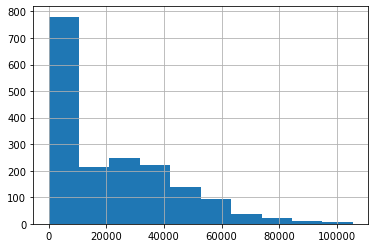

In [218]:
popultion_CA['Total Population'].hist()